# Example: How to run PyRayHF
This example shows how to call PyRayHF for a given set of input arrays

[ 90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117.
 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131.
 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215.
 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229.
 230. 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243.
 244. 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255. 256. 257.
 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271.
 272. 273. 274. 275. 276. 277. 278. 279. 280. 281. 282. 283. 284. 285.
 286. 

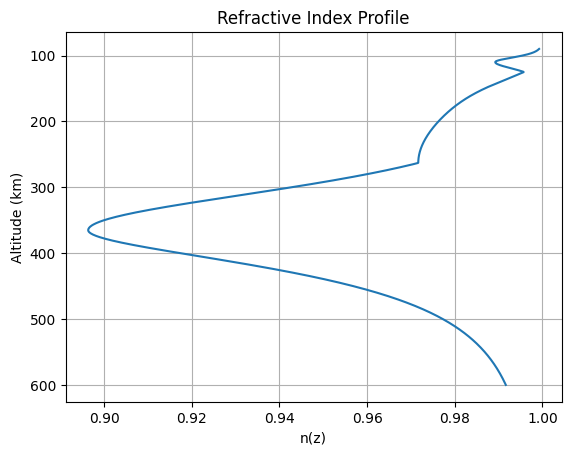

KeyboardInterrupt: 

In [1]:
import pickle
import matplotlib.pyplot as plt
import PyRayHF
import PyRayHF.ray_shooting_module

# Load input arrays from the example.
# See Example_Generate_Input_Arrays for how to create input arrays using PyIRI.
file_open = 'Example_input.p'
input_arrays = pickle.load(open(file_open, 'rb'))

# Save as a portable .npz file (Nova likes to read those)
import numpy as np
np.savez(
    "input_arrays_clean.npz",
    den=input_arrays['den'],
    alt=input_arrays['alt'],
    bmag=input_arrays['bmag'],
    bpsi=input_arrays['bpsi']
)

# Compute virtual height for the ordinary 'O' propagation mode.
# A low number of vertical grid points is sufficient for O-mode (e.g., 200).
mode = 'O'
n_points = 200

# Step 2: Get interpolators
freq = 3.5  # MHz
n_interp, _, _ = PyRayHF.ray_shooting_module.get_interp_refractive_indices(input_arrays, freq=freq, mode='O')
print('interpolation finished')


z_grid = np.linspace(90, 600, 1000)
n_profile = n_interp(z_grid)

plt.plot(n_profile, z_grid)
plt.xlabel("n(z)")
plt.ylabel("Altitude (km)")
plt.title("Refractive Index Profile")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


# Step 3: Find launch angle to hit a target range
z0 = input_arrays['alt'][0]  # launch altitude [km]
x_target = 600.0  # receiver range [km]
# theta_hit = PyRayHF.ray_shooting_module.find_launch_angle(n_interp, z0, x_target, theta_bounds=(40, 70))
theta = 40.

# Step 4: Trace ray with that launch angle
z_path, x_path, _ = PyRayHF.ray_shooting_module.trace_oblique_ray_full(n_interp, z0, theta, dz=0.5, z_max=300)
print('path finished')
# Step 5: Plot the ray path
plt.figure(figsize=(10, 6))
plt.plot(x_path, z_path, label=f"Launch = {theta:.1f}°")
plt.axvline(x_target, color='red', linestyle=':', label='Receiver (600 km)')
plt.xlabel("Horizontal Distance (km)")
plt.ylabel("Altitude (km)")
plt.title("Ray Path Reaching Receiver at 600 km")
plt.grid(True)
plt.legend()
plt.show()

